In [2]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd
import Nucleaseq_data_processing as processing
reload(processing);
import sys
sys.path.append('../code_general_Finkelsteinlab/')
import Process_SeqLibrary_Finkelsteinlab as process
reload(process)

path = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

In [3]:
position = 6

print 'PAM: G  G  U'
print '     C  C  A'
print ''

data = pd.read_csv(path+filename)
print 'Target E'
print '----------------------------------------------------------'
print '1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20'
guideseq = 'C  G  C  A  G  A  G  U  A  G  A  A  A  U  A  C  G  C  A  G'
print 'On-target guide:'
print guideseq
print 'Target:'
print 'G  C  G  T  C  T  C  A  T  C  T  T  T  A  T  G  C  G  T  C'
print '----------------------------------------------------------'
print ''
print ''

print 'Target D'
print '----------------------------------------------------------'
print '1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20'
guideseq = 'G  U  A  C  C  G  U  A  A  G  G  U  G  A  A  U  A  G  U  G'
print 'On-target guide:'
print guideseq
print 'Target:'
print 'C  A  T  G  G  C  A  T  T  C  C  A  C  T  T  A  T  C  A  C'
print '----------------------------------------------------------'

data.columns = [c.replace(' ', '_') for c in data.columns]
mismatch = data[data.Mutation_Positions == str(position)]
sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])

sequences = np.array(sequences)
rates = np.array(mismatch.cleavage_rate)

PAM: G  G  U
     C  C  A

Target E
----------------------------------------------------------
1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
On-target guide:
C  G  C  A  G  A  G  U  A  G  A  A  A  U  A  C  G  C  A  G
Target:
G  C  G  T  C  T  C  A  T  C  T  T  T  A  T  G  C  G  T  C
----------------------------------------------------------


Target D
----------------------------------------------------------
1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
On-target guide:
G  U  A  C  C  G  U  A  A  G  G  U  G  A  A  U  A  G  U  G
Target:
C  A  T  G  G  C  A  T  T  C  C  A  C  T  T  A  T  C  A  C
----------------------------------------------------------


In [4]:
A = list()
G = list()
C = list()
T = list()

for i in range(len(rates)):
    if sequences[i][position-1] == 'T':
        T.append(rates[i])
    elif sequences[i][position-1] == 'A':
        A.append(rates[i])
    elif sequences[i][position-1] == 'G':
        G.append(rates[i])
    elif sequences[i][position-1] == 'C':
        C.append(rates[i])
    else:
        print 'dubbelhuh'
        
if len(T)!=0:        
    print 'T: ' + str(np.mean(T)) + ', length: ' + str(len(T))       
if len(A)!=0:
    print 'A: ' + str(np.mean(A)) + ', length: ' + str(len(A))  
if len(G)!=0:
    print 'G: ' + str(np.mean(G)) + ', length: ' + str(len(G))  
if len(C)!=0:
    print 'C: ' + str(np.mean(C)) + ', length: ' + str(len(C))  

T: 0.0004248936260859643, length: 28
G: 0.01641468127897857, length: 28
C: 0.00011329169315466073, length: 28


C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0,0.5,'Cleavage rate')

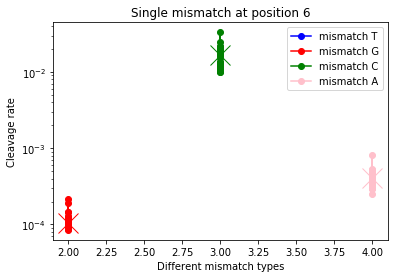

In [5]:
plt.semilogy(np.ones(len(A)),A,color='blue',marker='o')
plt.semilogy(np.ones(len(C))*2,C,color='red',marker='o')
plt.semilogy(np.ones(len(G))*3,G,color='green',marker='o')
plt.semilogy(np.ones(len(T))*4,T,color='pink',marker='o')
plt.semilogy(1,np.median(A),color='blue',marker='x',markersize=20)
plt.semilogy(2,np.median(C),color='red',marker='x',markersize=20)
plt.semilogy(3,np.median(G),color='green',marker='x',markersize=20)
plt.semilogy(4,np.median(T),color='pink',marker='x',markersize=20)
plt.legend(['mismatch T','mismatch G', 'mismatch C', 'mismatch A'])
plt.title('Single mismatch at position ' + str(position))
plt.xlabel('Different mismatch types')
plt.ylabel('Cleavage rate')

[0, 21, 1e-06, 1]

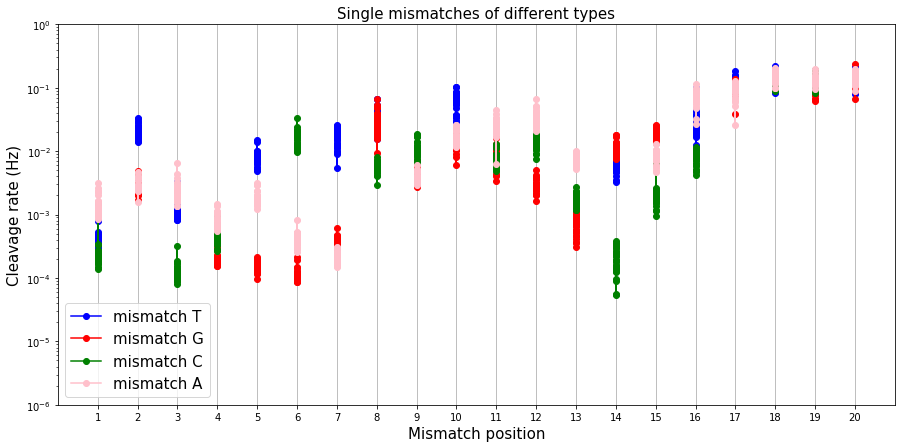

In [19]:
guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
plt.figure(figsize=[15,7])
for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
        #if guide_sequenceD[position-1] == 'C':
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plt.semilogy(np.ones(len(A))*position,A,color='blue',marker='o')
    plt.semilogy(np.ones(len(C))*position,C,color='red',marker='o')
    plt.semilogy(np.ones(len(G))*position,G,color='green',marker='o')
    plt.semilogy(np.ones(len(T))*position,T,color='pink',marker='o')

plt.vlines(range(1,21),10**-6,1,color='grey',linewidth=0.5)
plt.legend(['mismatch T','mismatch G', 'mismatch C', 'mismatch A'], fontsize=15)
plt.title('Single mismatches of different types', fontsize=15)
plt.xlabel('Mismatch position', fontsize=15)
plt.ylabel('Cleavage rate (Hz)', fontsize=15)
plt.xticks(range(1,21))
plt.axis([0, 21, 10**-6, 1])

Text(0,0.5,'Cleavage rate')

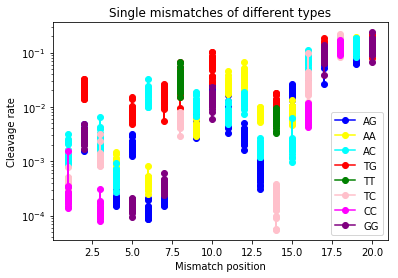

In [27]:
guide_sequence = 'CGCAGAGTAGAAATACGCAG'
for j in range(1,21):
    right = guide_sequence[j-1]
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    
    AG = list()
    AA = list()
    AC = list()
    TG = list()
    TT = list()
    TC = list()
    CC = list()
    GG = list()

    for i in range(len(rates)):
        if right == 'A':
            if sequences[i][position-1] == 'A':
                print 'huhA' + str(j)
            elif sequences[i][position-1] == 'T':
                AA.append(rates[i])
            elif sequences[i][position-1] == 'C':
                AG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                AC.append(rates[i])
            else:
                print 'dubbelhuhA' + str(j)
                
        if right == 'T':
            if sequences[i][position-1] == 'T':
                print 'huhT' + str(j)
            elif sequences[i][position-1] == 'A':
                TT.append(rates[i])
            elif sequences[i][position-1] == 'C':
                TG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                TC.append(rates[i])
            else:
                print 'dubbelhuhT' + str(j)
                
        if right == 'C':
            if sequences[i][position-1] == 'C':
                print 'huhC' + str(j)
            elif sequences[i][position-1] == 'T':
                AC.append(rates[i])
            elif sequences[i][position-1] == 'A':
                TC.append(rates[i])
            elif sequences[i][position-1] == 'G':
                CC.append(rates[i])
            else:
                print 'dubbelhuhC' + str(j)
                
        if right == 'G':
            if sequences[i][position-1] == 'G':
                print 'huhG'+ str(j) 
            elif sequences[i][position-1] == 'T':
                AG.append(rates[i])
            elif sequences[i][position-1] == 'C':
                GG.append(rates[i])
            elif sequences[i][position-1] == 'A':
                TG.append(rates[i])
            else:
                print 'dubbelhuhG' + str(j)
                
    

    plt.semilogy(np.ones(len(AG))*position,AG,color='blue',marker='o')
    plt.semilogy(np.ones(len(AA))*position,AA,color='yellow',marker='o')
    plt.semilogy(np.ones(len(AC))*position,AC,color='cyan',marker='o')
    plt.semilogy(np.ones(len(TG))*position,TG,color='red',marker='o')
    plt.semilogy(np.ones(len(TT))*position,TT,color='green',marker='o')
    plt.semilogy(np.ones(len(TC))*position,TC,color='pink',marker='o')
    plt.semilogy(np.ones(len(CC))*position,CC,color='magenta',marker='o')
    plt.semilogy(np.ones(len(GG))*position,GG,color='purple',marker='o')
    
plt.legend(['AG','AA','AC','TG','TT','TC','CC','GG'])
plt.title('Single mismatches of different types')
plt.xlabel('Mismatch position')
plt.ylabel('Cleavage rate')

Text(0,0.5,'Cleavage rate')

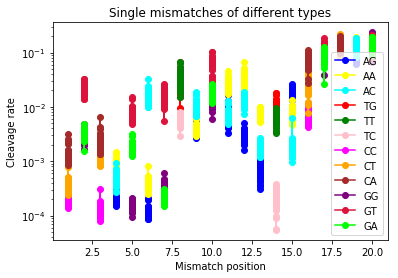

In [28]:
guide_sequence = 'CGCAGAGTAGAAATACGCAG'
for j in range(1,21):
    right = guide_sequence[j-1]
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: process.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    
    AG = list()
    AA = list()
    AC = list()
    TG = list()
    TT = list()
    TC = list()
    CC = list()
    CA = list()
    CT = list()
    GT = list()
    GG = list()
    GA = list()

    for i in range(len(rates)):
        if right == 'A':
            if sequences[i][position-1] == 'A':
                print 'huhA' + str(j)
            elif sequences[i][position-1] == 'T':
                AA.append(rates[i])
            elif sequences[i][position-1] == 'C':
                AG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                AC.append(rates[i])
            else:
                print 'dubbelhuhA' + str(j)
                
        if right == 'T':
            if sequences[i][position-1] == 'T':
                print 'huhT' + str(j)
            elif sequences[i][position-1] == 'A':
                TT.append(rates[i])
            elif sequences[i][position-1] == 'C':
                TG.append(rates[i])
            elif sequences[i][position-1] == 'G':
                TC.append(rates[i])
            else:
                print 'dubbelhuhT' + str(j)
                
        if right == 'C':
            if sequences[i][position-1] == 'C':
                print 'huhC' + str(j)
            elif sequences[i][position-1] == 'T':
                CA.append(rates[i])
            elif sequences[i][position-1] == 'A':
                CT.append(rates[i])
            elif sequences[i][position-1] == 'G':
                CC.append(rates[i])
            else:
                print 'dubbelhuhC' + str(j)
                
        if right == 'G':
            if sequences[i][position-1] == 'G':
                print 'huhG'+ str(j) 
            elif sequences[i][position-1] == 'T':
                GA.append(rates[i])
            elif sequences[i][position-1] == 'C':
                GG.append(rates[i])
            elif sequences[i][position-1] == 'A':
                GT.append(rates[i])
            else:
                print 'dubbelhuhG' + str(j)
                
    

    plt.semilogy(np.ones(len(AG))*position,AG,color='blue',marker='o')
    plt.semilogy(np.ones(len(AA))*position,AA,color='yellow',marker='o')
    plt.semilogy(np.ones(len(AC))*position,AC,color='cyan',marker='o')
    plt.semilogy(np.ones(len(TG))*position,TG,color='red',marker='o')
    plt.semilogy(np.ones(len(TT))*position,TT,color='green',marker='o')
    plt.semilogy(np.ones(len(TC))*position,TC,color='pink',marker='o')
    plt.semilogy(np.ones(len(CC))*position,CC,color='magenta',marker='o')
    plt.semilogy(np.ones(len(CT))*position,CT,color='orange',marker='o')
    plt.semilogy(np.ones(len(CA))*position,CA,color='brown',marker='o')
    plt.semilogy(np.ones(len(GG))*position,GG,color='purple',marker='o')
    plt.semilogy(np.ones(len(GT))*position,GT,color='crimson',marker='o')
    plt.semilogy(np.ones(len(GA))*position,GA,color='lime',marker='o')
    
plt.legend(['AG','AA','AC','TG','TT','TC','CC','CT','CA','GG','GT','GA'])
plt.title('Single mismatches of different types')
plt.xlabel('Mismatch position')
plt.ylabel('Cleavage rate')